<a href="https://colab.research.google.com/github/Jgallear/CSSP_brazil_23_24/blob/main/plot_gbm_1_3_month_forecast_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import mapping
from sklearn.inspection import PartialDependenceDisplay
from shapely.geometry import Point
from sklearn.metrics import mean_absolute_error
from scipy.stats import pearsonr
#from cartopy.feature import ShapelyFeature
#from cartopy.io.shapereader import Reader
#from rasterio import CRS
from shapely.geometry import mapping
import xarray as xr
from statsmodels.graphics.tsaplots import plot_acf
from keras import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import functools
import pickle
#import cartopy.feature as cf
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
import seaborn as sns

In [ ]:
# read in each csv file
gbm_scores_1m=pd.read_csv('/content/drive/MyDrive/model_outs/GBM_1month.csv')
gbm_scores_2m=pd.read_csv('/content/drive/MyDrive/model_outs/GBM_2month.csv')
gbm_scores_3m=pd.read_csv('/content/drive/MyDrive/model_outs/GBM_3month.csv')

In [ ]:
print(gbm_scores_1m)

         R2       MAE
0  0.634437  6.941393
1  0.645057  5.881574
2  0.634437  6.941393
3  0.346199  7.115237
4  0.685964  6.120943
5  0.634433  6.941477
6  0.550375  5.952872
7  0.547343  5.519165
8  0.459028  6.670447
9  0.674274  5.686008


In [ ]:
gbm_scores_1m['forecast time (months)'] = [1]*len(gbm_scores_1m)

In [ ]:
print(gbm_scores_1m)

         R2       MAE  forecast time (months)
0  0.634437  6.941393                       1
1  0.645057  5.881574                       1
2  0.634437  6.941393                       1
3  0.346199  7.115237                       1
4  0.685964  6.120943                       1
5  0.634433  6.941477                       1
6  0.550375  5.952872                       1
7  0.547343  5.519165                       1
8  0.459028  6.670447                       1
9  0.674274  5.686008                       1


In [ ]:
gbm_scores_2m['forecast time (months)'] = [2]*len(gbm_scores_2m)

In [ ]:
gbm_scores_3m['forecast time (months)'] = [3]*len(gbm_scores_3m)

In [ ]:
combined_df = pd.concat([gbm_scores_1m,gbm_scores_2m,gbm_scores_3m])

In [ ]:
print(combined_df)

         R2        MAE  forecast time (months)
0  0.634437   6.941393                       1
1  0.645057   5.881574                       1
2  0.634437   6.941393                       1
3  0.346199   7.115237                       1
4  0.685964   6.120943                       1
5  0.634433   6.941477                       1
6  0.550375   5.952872                       1
7  0.547343   5.519165                       1
8  0.459028   6.670447                       1
9  0.674274   5.686008                       1
0  0.241169   9.904840                       2
1  0.068748   9.534658                       2
2  0.241169   9.904840                       2
3 -0.001834   9.358235                       2
4  0.298730   9.378293                       2
5  0.241169   9.904840                       2
6  0.246180   7.852045                       2
7  0.045480   8.204122                       2
8  0.007260   9.283395                       2
9  0.280555   8.311567                       2
0  0.086234  

<Axes: xlabel='forecast time (months)', ylabel='R2'>

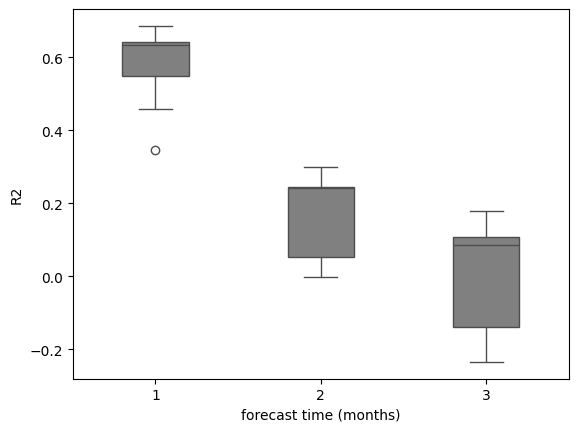

In [ ]:
sns.boxplot(data=combined_df,x='forecast time (months)',y='R2',width=0.4,color='grey')

<Axes: xlabel='forecast time (months)', ylabel='MAE'>

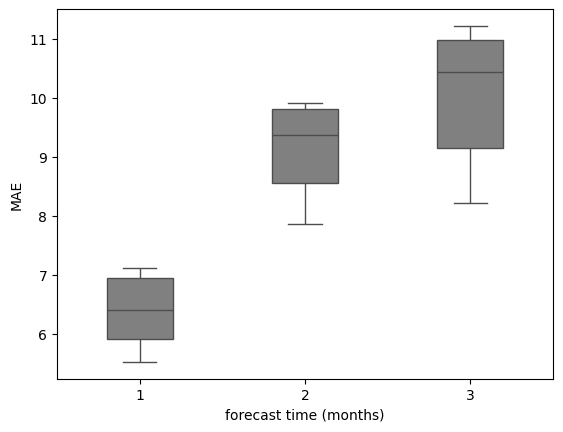

In [ ]:
sns.boxplot(data=combined_df,x='forecast time (months)',y='MAE',width=0.4,color='grey')

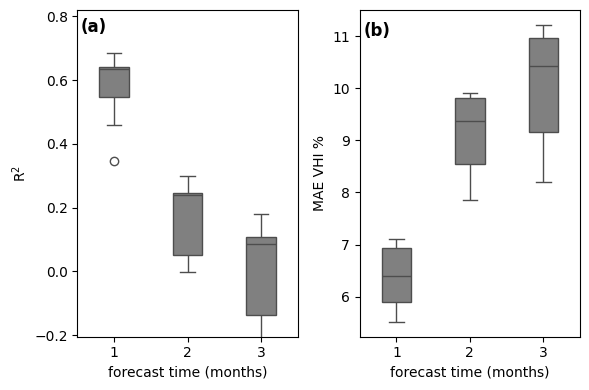

In [ ]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(1,2,1)
sns.boxplot(data=combined_df,x='forecast time (months)',y='R2',width=0.4,color='grey',ax=ax1)
ax1.text(-0.45,0.75,s='(a)',weight='bold',fontsize=12)
ax1.set_ylim(-0.205,0.82)
ax2 = fig.add_subplot(1,2,2)
sns.boxplot(data=combined_df,x='forecast time (months)',y='MAE',width=0.4,color='grey',ax=ax2)
ax2.text(-0.45,11,s='(b)',weight='bold',fontsize=12)
ax1.set_ylabel(r'R$^2$')
ax2.set_ylabel('MAE VHI %')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Figures/GBM_123_month_comparison_boxplt.png',dpi=300)
plt.show()

In [ ]:
print(combined_df)

         R2        MAE  forecast time (months)
0  0.634437   6.941393                       1
1  0.645057   5.881574                       1
2  0.634437   6.941393                       1
3  0.346199   7.115237                       1
4  0.685964   6.120943                       1
5  0.634433   6.941477                       1
6  0.550375   5.952872                       1
7  0.547343   5.519165                       1
8  0.459028   6.670447                       1
9  0.674274   5.686008                       1
0  0.241169   9.904840                       2
1  0.068748   9.534658                       2
2  0.241169   9.904840                       2
3 -0.001834   9.358235                       2
4  0.298730   9.378293                       2
5  0.241169   9.904840                       2
6  0.246180   7.852045                       2
7  0.045480   8.204122                       2
8  0.007260   9.283395                       2
9  0.280555   8.311567                       2
0  0.086234  

In [ ]:
m1 = combined_df[combined_df['forecast time (months)']==1]
m2 = combined_df[combined_df['forecast time (months)']==2]
m3 = combined_df[combined_df['forecast time (months)']==3]

In [ ]:
print(m1)

         R2       MAE  forecast time (months)
0  0.634437  6.941393                       1
1  0.645057  5.881574                       1
2  0.634437  6.941393                       1
3  0.346199  7.115237                       1
4  0.685964  6.120943                       1
5  0.634433  6.941477                       1
6  0.550375  5.952872                       1
7  0.547343  5.519165                       1
8  0.459028  6.670447                       1
9  0.674274  5.686008                       1


In [ ]:
print(np.median(m1['R2']))
print(np.median(m2['R2']))
print(np.median(m3['R2']))

0.6344347285633731
0.24116914693317265
0.0862340711460773
